In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
files = os.listdir('riviera42_data')

In [5]:
files

['.ipynb_checkpoints',
 'cheqdet.csv',
 'cheques.csv',
 'chequespagos.csv',
 'clientes.csv',
 'colonias.csv',
 'direccionesdomicilio.csv',
 'formasdepago.csv',
 'grupos.csv',
 'gruposmodificadores.csv',
 'gruposmodificadoresproductos.csv',
 'grupossubgrupos.csv',
 'modificadores.csv',
 'Month.csv',
 'PaymentMethod.csv',
 'Periodicity.csv',
 'productos.csv',
 'productosdetalle.csv',
 'promociones.csv',
 'subgrupos.csv',
 'subgruposproductos.csv']

In [6]:
cheques = pd.read_csv('riviera42_data/cheques.csv', index_col=False)

In [7]:
direccionesdomicilio = pd.read_csv('riviera42_data/direccionesdomicilio.csv', index_col=False)

In [8]:
colonias = pd.read_csv('riviera42_data/colonias.csv', index_col=False)

In [9]:
clientes = pd.read_csv('riviera42_data/clientes.csv', index_col=False)

In [62]:
cheqdet = pd.read_csv('riviera42_data/cheqdet.csv', index_col=False)

In [10]:
cheques

,folio,fecha,nopersonas,cambio,descuento,idcliente,tipodeservicio,total,efectivo,tarjeta,totalalimentos,totalbebidas
0,1,2018-02-01 16:13:38.000,8,0.0,0.0,NaN,1,825.0,825.0,0.0,551.7241,159.4828
1,2,2018-02-01 19:56:38.000,1,0.0,0.0,NaN,1,85.0,85.0,0.0,51.7241,21.5517
2,3,2018-02-01 20:28:14.000,1,0.0,0.0,NaN,1,120.0,120.0,0.0,81.8966,21.5517
3,4,2018-02-01 20:33:06.000,1,0.0,0.0,NaN,1,490.0,0.0,539.0,336.2069,86.2069
4,5,2018-02-01 20:59:32.000,1,0.0,0.0,NaN,1,600.0,0.0,600.0,344.8276,172.4138
...,...,...,...,...,...,...,...,...,...,...,...,...
49733,51218,2022-03-12 20:42:15.000,1,0.0,0.0,006446,2,220.0,220.0,0.0,189.6552,0.0000
49734,51219,2022-03-12 20:46:26.000,1,0.0,0.0,001082,2,280.0,280.0,0.0,241.3793,0.0000
49735,51220,2022-03-12 20:48:10.000,1,0.0,0.0,002714,2,280.0,280.0,0.0,241.3793,0.0000
49736,51221,2022-03-12 21:00:15.000,8,0.0,0.0,NaN,1,940.0,0.0,1034.0,491.3793,318.9655


In [11]:
direcciones = direccionesdomicilio

In [12]:
pedidos = cheques.join(direcciones[['idcliente','idcolonia']].set_index('idcliente'),on='idcliente').join(colonias.set_index('idcolonia')['descripcion'],on='idcolonia',lsuffix='col')

In [13]:
'''
plt.pie(ef_y_t, shadow=True, labels =['Efectivo','Tarjeta'],autopct= lambda pct: f'{pct:.1f}%')
plt.title('Riviera 42: Ventas Efectivo vs Tarjeta')
plt.show()
'''

"\nplt.pie(ef_y_t, shadow=True, labels =['Efectivo','Tarjeta'],autopct= lambda pct: f'{pct:.1f}%')\nplt.title('Riviera 42: Ventas Efectivo vs Tarjeta')\nplt.show()\n"

In [14]:
clientes = clientes.drop('direccion',axis=1)

In [15]:
clientes = clientes.join(direcciones.set_index('idcliente'), on='idcliente')

In [16]:
domicilio = pedidos[pedidos.tipodeservicio == 2]

In [17]:
clientes[clientes.idcliente=='001841']

,idcliente,nombre,telefono1,telefono2,iddireccion,idcolonia,calle,numeroexterior,numerointerior,cruzamiento1,cruzamiento2,codigopostal,referencia
1835,001841,RODRIGO NOYA,2293653336,NaN,CASA,64.0,AVENIDA LA MATOZA TORRE RIVIERA 504,17,DEP 504,NaN,NaN,NaN,NaN


In [18]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7209 entries, 0 to 7141
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idcliente       7209 non-null   object 
 1   nombre          7209 non-null   object 
 2   telefono1       6852 non-null   object 
 3   telefono2       37 non-null     object 
 4   iddireccion     6871 non-null   object 
 5   idcolonia       6861 non-null   float64
 6   calle           6869 non-null   object 
 7   numeroexterior  6669 non-null   object 
 8   numerointerior  535 non-null    object 
 9   cruzamiento1    975 non-null    object 
 10  cruzamiento2    279 non-null    object 
 11  codigopostal    29 non-null     object 
 12  referencia      1237 non-null   object 
dtypes: float64(1), object(12)
memory usage: 788.5+ KB


In [19]:
fracs_total_domicilio = domicilio[(~domicilio.descripcion.isin(['TOGO','PLAZA RIVIERA','CARR RIVIERA VERACRUZANA']))].groupby(['descripcion'])[['total']].sum()

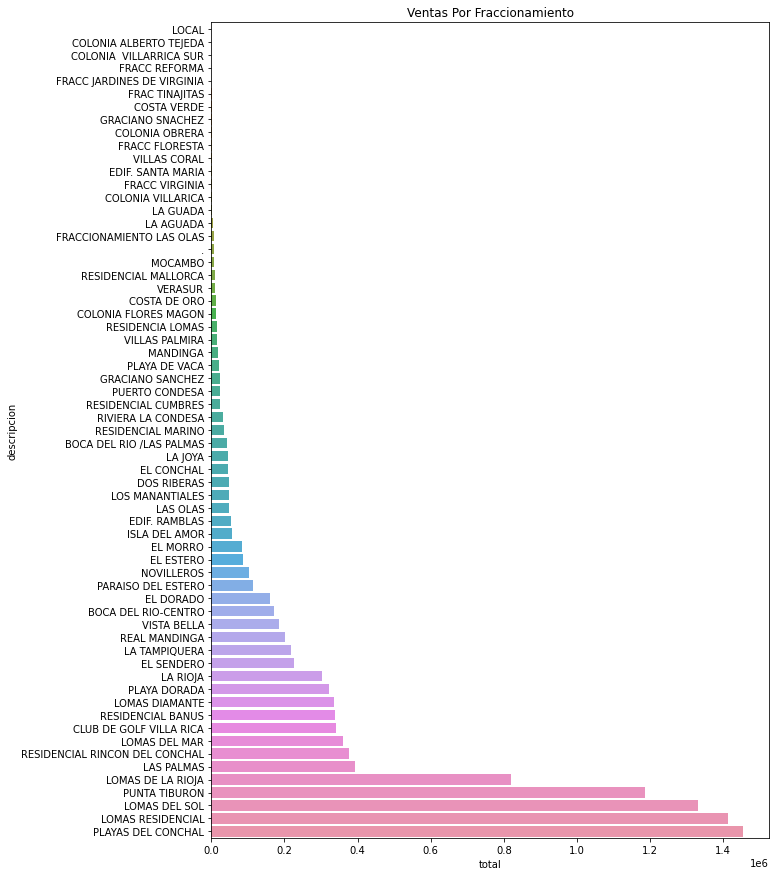

In [20]:
fig, ax = plt.subplots(figsize=(10,15))
ax = sns.barplot(x="total", y=fracs_total_domicilio.index, data=fracs_total_domicilio, estimator=sum, order=fracs_total_domicilio.sort_values('total', ascending=True).index)
plt.title('Ventas Por Fraccionamiento')
plt.style.use('dark_background')
plt.show()

In [21]:
pedidos.fecha = pd.to_datetime(pedidos.fecha)

In [22]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51312 entries, 0 to 49737
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   folio           51312 non-null  int64         
 1   fecha           51312 non-null  datetime64[ns]
 2   nopersonas      51312 non-null  int64         
 3   cambio          51312 non-null  float64       
 4   descuento       51312 non-null  float64       
 5   idcliente       44051 non-null  object        
 6   tipodeservicio  51312 non-null  int64         
 7   total           51312 non-null  float64       
 8   efectivo        51312 non-null  float64       
 9   tarjeta         51312 non-null  float64       
 10  totalalimentos  51312 non-null  float64       
 11  totalbebidas    51312 non-null  float64       
 12  idcolonia       41365 non-null  float64       
 13  descripcion     41365 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(2)


In [23]:
ventas = pedidos.copy()

In [24]:
ventas_diarias = ventas.groupby('fecha').sum().resample('D').agg('sum')

In [25]:
visitas_mensuales = ventas[ventas.tipodeservicio==1].groupby('fecha').sum().resample('M').agg('sum')

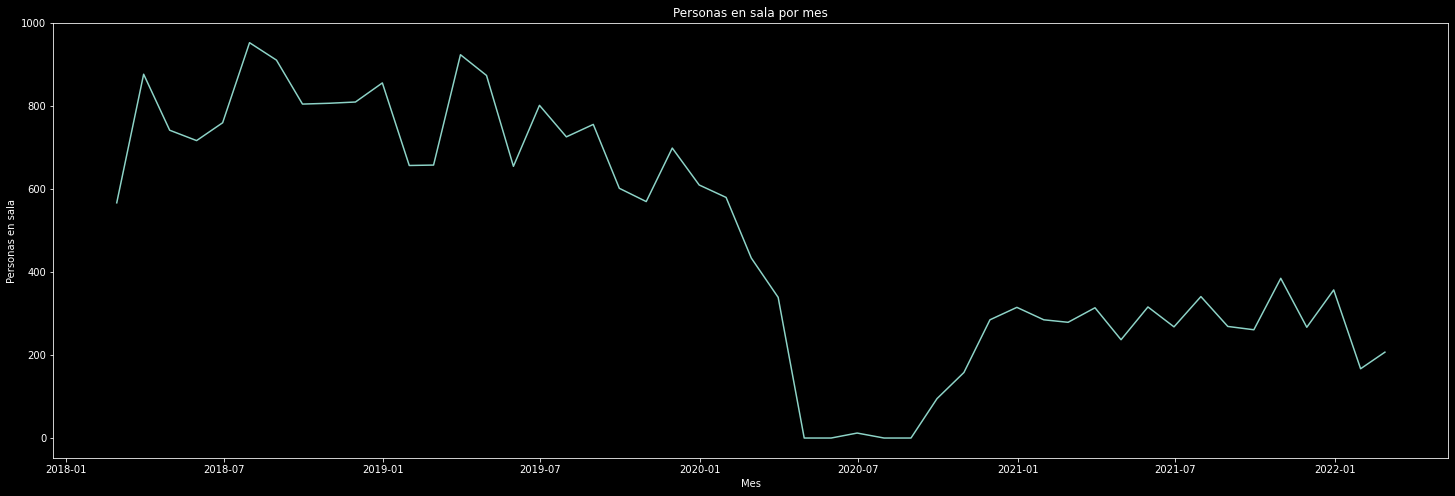

In [26]:
fig, ax = plt.subplots(figsize = (25,8))
ax = plt.plot(visitas_mensuales.index[:-1],visitas_mensuales.nopersonas[:-1])
plt.xlabel('Mes')
plt.ylabel('Personas en sala')
plt.title('Personas en sala por mes')
plt.show()

In [27]:
ventas_mensuales_promedio = ventas.groupby('fecha').mean().resample('M').agg('mean')

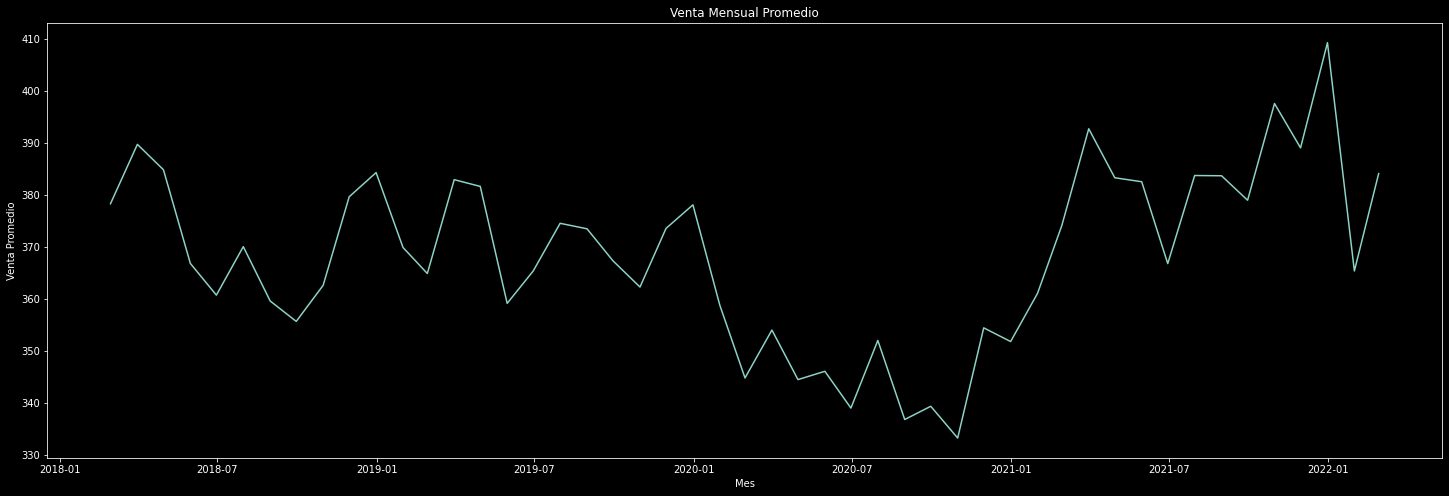

In [28]:
fig, ax = plt.subplots(figsize = (25,8))
ax = plt.plot(ventas_mensuales_promedio.index[:-1],ventas_mensuales_promedio.total[:-1])
plt.xlabel('Mes')
plt.ylabel('Venta Promedio')
plt.title('Venta Mensual Promedio')
plt.show()

In [29]:
ventas_mensuales = ventas.groupby('fecha').sum().resample('M').agg('sum')

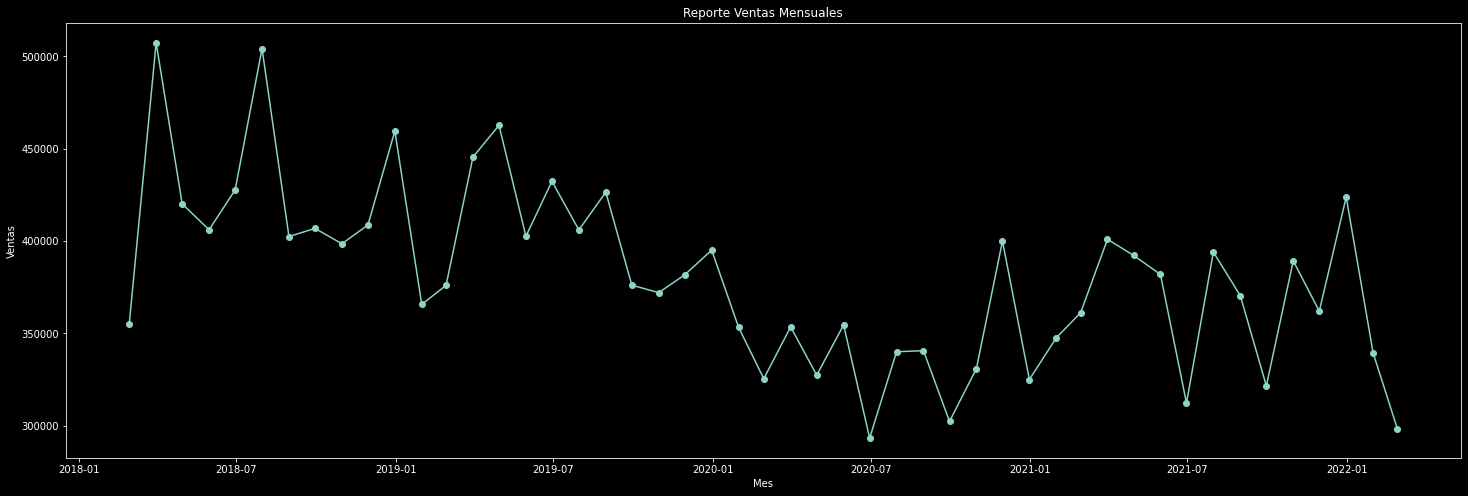

In [30]:
fig, ax = plt.subplots(figsize = (25,8))
ax = plt.plot(ventas_mensuales.index[:-1],ventas_mensuales.total[:-1],marker='o')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Reporte Ventas Mensuales')
plt.show()

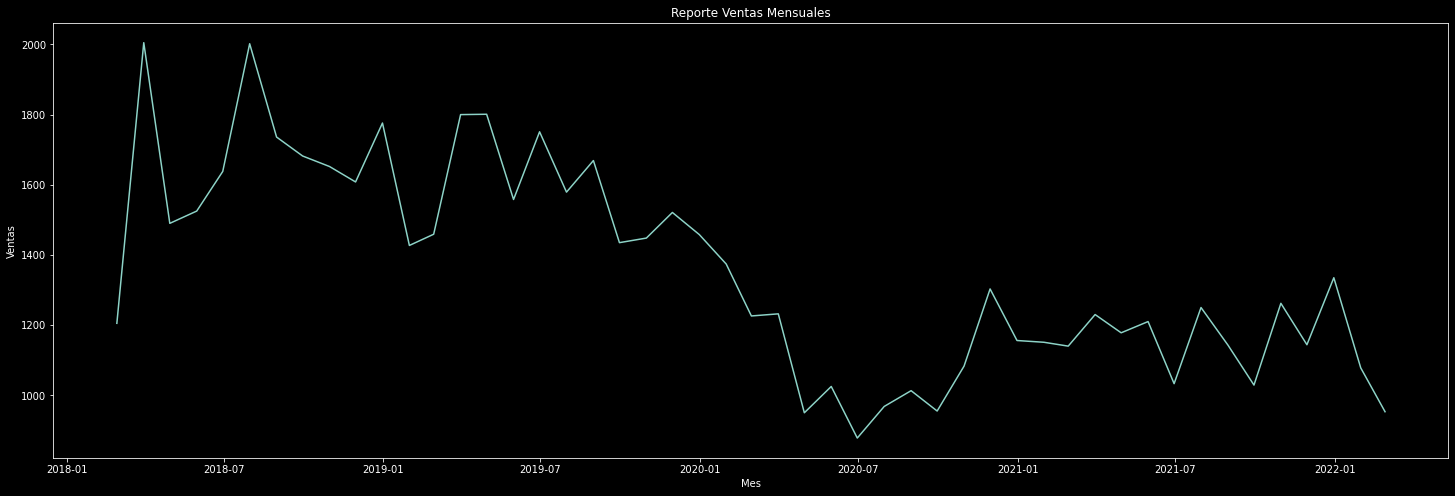

In [31]:
fig, ax = plt.subplots(figsize = (25,8))
ax = plt.plot(ventas_mensuales.index[:-1],ventas_mensuales.nopersonas[:-1])
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Reporte Ventas Mensuales')
plt.show()

In [57]:
ventas_mensuales[['total']].to_csv('Wrangled_data/Ventas_mensuales.csv',index=True)

In [47]:
mesa_mensual = pedidos[['fecha','total']][pedidos.tipodeservicio==1].groupby('fecha').sum().resample('M').sum()

In [56]:
mesa_mensual.to_csv('Wrangled_data/Mesa_Mensual.csv',index=True)

In [52]:
domicilio_togo_mensual = pedidos[['fecha','total']][pedidos.tipodeservicio.isin([2,3])].groupby('fecha').sum().resample('M').sum()

In [55]:
domicilio_togo_mensual.to_csv('Wrangled_data/DomTogo_Mensual.csv',index=True)

<AxesSubplot:xlabel='fecha'>

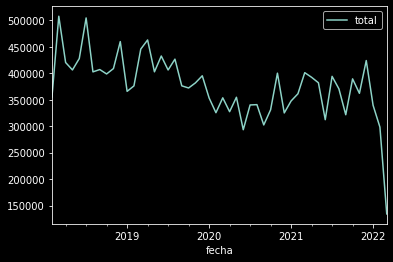

In [58]:
ventas_mensuales[['total']].plot()

In [69]:
cheqdet

,foliodet,cantidad,idproducto,precio,preciocatalogo,hora,modificador,mitad,idproductocompuesto,productocompuestoprincipal
0,2,1.0,11002,60.0,60.0,2018-02-01 20:24:59.000,0,0.0,NaN,0
1,2,1.0,1005,25.0,25.0,2018-02-01 20:24:59.000,0,0.0,NaN,0
2,3,1.0,5003,0.0,0.0,2018-02-01 20:28:41.000,0,0.0,_54E17VP7Z,1
3,3,1.0,8003,95.0,95.0,2018-02-01 20:28:41.000,1,1.0,_54E17VP7Z,0
4,3,1.0,1002,25.0,25.0,2018-02-01 20:28:41.000,0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...
172320,51215,1.0,5001,200.0,200.0,2022-03-12 20:16:56.000,0,0.0,NaN,0
172321,51215,1.0,6009,280.0,280.0,2022-03-12 20:16:56.000,0,0.0,_6A917BPG0,1
172322,51215,1.0,12005,30.0,30.0,2022-03-12 20:16:56.000,0,0.0,NaN,0
172323,51215,1.0,12045,30.0,30.0,2022-03-12 20:16:56.000,0,0.0,NaN,0


In [76]:
pedidos

,folio,fecha,nopersonas,cambio,descuento,idcliente,tipodeservicio,total,efectivo,tarjeta,totalalimentos,totalbebidas,idcolonia,descripcion
0,1,2018-02-01 16:13:38,8,0.0,0.0,NaN,1,825.0,825.0,0.0,551.7241,159.4828,NaN,NaN
1,2,2018-02-01 19:56:38,1,0.0,0.0,NaN,1,85.0,85.0,0.0,51.7241,21.5517,NaN,NaN
2,3,2018-02-01 20:28:14,1,0.0,0.0,NaN,1,120.0,120.0,0.0,81.8966,21.5517,NaN,NaN
3,4,2018-02-01 20:33:06,1,0.0,0.0,NaN,1,490.0,0.0,539.0,336.2069,86.2069,NaN,NaN
4,5,2018-02-01 20:59:32,1,0.0,0.0,NaN,1,600.0,0.0,600.0,344.8276,172.4138,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49734,51219,2022-03-12 20:46:26,1,0.0,0.0,001082,2,280.0,280.0,0.0,241.3793,0.0000,11.0,REAL MANDINGA
49735,51220,2022-03-12 20:48:10,1,0.0,0.0,002714,2,280.0,280.0,0.0,241.3793,0.0000,14.0,DOS RIBERAS
49736,51221,2022-03-12 21:00:15,8,0.0,0.0,NaN,1,940.0,0.0,1034.0,491.3793,318.9655,NaN,NaN
49737,51222,2022-03-12 21:47:18,1,0.0,0.0,006850,2,290.0,0.0,290.0,250.0000,0.0000,72.0,PLAZA RIVIERA


In [72]:
cheqdet = cheqdet.join(cheques.set_index('folio')[['tipodeservicio']], on='foliodet')

In [80]:
prods_mesa = cheqdet[cheqdet.tipodeservicio == 1][['cantidad','idproducto','precio','modificador']]

In [84]:
productos = pd.read_csv('riviera42_data/productos.csv', index_col=False)

In [82]:
grupos = pd.read_csv('riviera42_data/grupos.csv', index_col=False)

In [81]:
prods_mesa

,cantidad,idproducto,precio,modificador
0,1.0,11002,60.0,0
1,1.0,1005,25.0,0
2,1.0,5003,0.0,0
3,1.0,8003,95.0,1
4,1.0,1002,25.0,0
...,...,...,...,...
172279,1.0,12015,30.0,0
172312,1.0,1012,110.0,0
172313,1.0,1007,25.0,0
172314,1.0,2003,170.0,0


In [85]:
productos

,idproducto,descripcion,idgrupo
0,1001,CAFÉ AMERICANO,1
1,1002,COCA COLA 355 ML,1
2,1003,SIDRAL MANZANA 355 ML,1
3,1004,MIRINDA TORONJA 355 ML,1
4,1005,FRESCA 355 ML,1
...,...,...,...
295,15023,COPA MATUSALEM GRANRESERVA,15
296,16001,CAMARONES RIVIERA 42 CON SALSA NEGRA,18
297,17001,CAMARONES AL COCO,18
298,20001,MIERCOLES DE PIZZA,20


In [90]:
prods_mesa = prods_mesa.join(productos.set_index('idproducto'), on='idproducto')

In [92]:
prods_mesa = prods_mesa[['cantidad','idproducto','precio','idgrupo']]

In [93]:
prods_mesa

,cantidad,idproducto,precio,idgrupo
0,1.0,11002,60.0,11
1,1.0,1005,25.0,1
2,1.0,5003,0.0,5
3,1.0,8003,95.0,8
4,1.0,1002,25.0,1
...,...,...,...,...
172279,1.0,12015,30.0,12
172312,1.0,1012,110.0,1
172313,1.0,1007,25.0,1
172314,1.0,2003,170.0,2


In [97]:
prods_mesa = prods_mesa.join(grupos.set_index('idgrupo'), on='idgrupo')

In [101]:
prods_mesa = prods_mesa[['cantidad','idproducto','precio','idgrupo','descripcion']]

In [110]:
prods_mesa

,cantidad,idproducto,precio,idgrupo,descripcion
0,1.0,11002,60.0,11,POSTRES
1,1.0,1005,25.0,1,BEBIDAS
2,1.0,5003,0.0,5,PASTAS
3,1.0,8003,95.0,8,MODIFICADORES
4,1.0,1002,25.0,1,BEBIDAS
...,...,...,...,...,...
172279,1.0,12015,30.0,12,EXTRAS
172312,1.0,1012,110.0,1,BEBIDAS
172313,1.0,1007,25.0,1,BEBIDAS
172314,1.0,2003,170.0,2,ENSALADAS


In [118]:
prods_mesa_totales = prods_mesa.groupby('idgrupo').sum()[['cantidad','precio']].join(grupos.set_index('idgrupo'), on='idgrupo')[['precio','descripcion']]

In [122]:
prods_mesa_totales['porcentaje'] = prods_mesa_totales.precio*100/prods_mesa_totales.precio.sum()

In [123]:
prods_mesa_totales

,precio,descripcion,porcentaje
idgrupo,,,
1,545990.0,BEBIDAS,10.454201
2,265090.0,ENSALADAS,5.075742
3,278490.0,ENTRADAS,5.332315
5,121375.0,PASTAS,2.323996
6,2789990.0,PIZZAS,53.420606
7,34340.0,PIZZAS DULCES,0.657516
8,509430.0,MODIFICADORES,9.754178
9,132850.0,CERVEZAS,2.543711
10,404875.0,VINO,7.752239


In [127]:
procentaje_ganancia_grupos = [90,78,84,82,75,86,90,70,43,75,80,80,80,71,80]

In [128]:
prods_mesa_totales['%gan'] = procentaje_ganancia_grupos

In [134]:
prods_mesa_totales['wavg']= prods_mesa_totales.porcentaje*prods_mesa_totales['%gan']

In [136]:
prods_mesa_totales['wavg'].sum()/100

76.29735184105495

In [137]:
domicilio_togo_mensual

,total
fecha,
2018-02-28,193250.0
2018-03-31,296942.5
2018-04-30,238950.0
2018-05-31,256140.0
2018-06-30,270991.0
2018-07-31,334255.0
2018-08-31,250070.0
2018-09-30,262570.0
2018-10-31,259310.0
